## Part I: Data Pre-processing

In [2]:
import pandas as pd

In [3]:
# Download the Google Analogy dataset
!wget http://download.tensorflow.org/data/questions-words.txt

--2025-10-02 05:18:55--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.198.91, 142.250.66.91, 142.250.204.59, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.198.91|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt.2’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.03s   

2025-10-02 05:18:55 (21.5 MB/s) - ‘questions-words.txt.2’ saved [603955/603955]



In [4]:
# Preprocess the dataset
file_name = "questions-words"
with open(f"{file_name}.txt", "r") as f:
    data = f.read().splitlines()

In [5]:
# check data from the first 10 entries
for entry in data[:10]:
    print(entry)

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [6]:
# TODO1: Write your code here for processing data to pd.DataFrame
# Please note that the first five mentions of ": " indicate `semantic`,
# and the remaining nine belong to the `syntatic` category.
count_subcat = 0
count_entries = 0
questions = []
categories = []
sub_categories = []
current_subcat = ""
current_cat = ""
for entry in data:
    count_entries += 1
    if ": " in entry:
        count_subcat += 1
        if(count_subcat >1):
          print(f"Entries for category {current_cat} and subcategory {current_subcat}: \n{count_entries}")
        count_entries = 0
        current_subcat = entry
        if count_subcat <= 5:
            current_cat = "Semantic"
        elif count_subcat > 5:
            current_cat = "Syntactic"
    else:
        categories.append(current_cat)
        sub_categories.append(current_subcat)
        questions.append(entry)

print(f"Entries for category {current_cat} and subcategory {current_subcat}: \n{count_entries}")
print(f"\nCount of subcategories: {count_subcat}")


Entries for category Semantic and subcategory : capital-common-countries: 
507
Entries for category Semantic and subcategory : capital-world: 
4525
Entries for category Semantic and subcategory : currency: 
867
Entries for category Semantic and subcategory : city-in-state: 
2468
Entries for category Semantic and subcategory : family: 
507
Entries for category Syntactic and subcategory : gram1-adjective-to-adverb: 
993
Entries for category Syntactic and subcategory : gram2-opposite: 
813
Entries for category Syntactic and subcategory : gram3-comparative: 
1333
Entries for category Syntactic and subcategory : gram4-superlative: 
1123
Entries for category Syntactic and subcategory : gram5-present-participle: 
1057
Entries for category Syntactic and subcategory : gram6-nationality-adjective: 
1600
Entries for category Syntactic and subcategory : gram7-past-tense: 
1561
Entries for category Syntactic and subcategory : gram8-plural: 
1333
Entries for category Syntactic and subcategory : gram

In [7]:
# Create the dataframe
df = pd.DataFrame(
    {
        "Question": questions,
        "Category": categories,
        "SubCategory": sub_categories,
    }
)

In [8]:
df.head()

,Question,Category,SubCategory
0,Athens Greece Baghdad Iraq,Semantic,: capital-common-countries
1,Athens Greece Bangkok Thailand,Semantic,: capital-common-countries
2,Athens Greece Beijing China,Semantic,: capital-common-countries
3,Athens Greece Berlin Germany,Semantic,: capital-common-countries
4,Athens Greece Bern Switzerland,Semantic,: capital-common-countries


In [9]:
df.to_csv(f"{file_name}.csv", index=False)

## Part II: Use pre-trained word embeddings
- After finish Part I, you can run Part II code blocks only.

In [36]:
import pandas as pd
import numpy as np
import gensim.downloader
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [11]:
data = pd.read_csv("questions-words.csv")

In [12]:
MODEL_NAME = "glove-wiki-gigaword-100"
# You can try other models.
# https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models

# Load the pre-trained model (using GloVe vectors here)
model = gensim.downloader.load(MODEL_NAME)
print("The Gensim model loaded successfully!")

The Gensim model loaded successfully!


Exploring the data manipulation functions

In [13]:
data["Question"][0].split(" ")[0]

'Athens'

In [14]:
str(data["Question"][0])

'Athens Greece Baghdad Iraq'

In [15]:
model[data["Question"][0].split(" ")[0].lower()]

array([ 1.7342e-01,  1.8416e-01,  1.0752e-01,  8.0895e-02, -6.0546e-02,
        6.4409e-01, -6.6417e-01,  7.5784e-03,  3.2781e-01,  8.6334e-01,
       -1.7249e-02,  1.3235e-01, -1.1111e-01,  8.2899e-02, -1.8723e+00,
       -2.4523e-01, -3.6590e-01,  2.5461e-01, -1.0039e+00, -5.7647e-01,
       -2.2902e-01, -1.5441e-03, -1.5344e-01,  9.8980e-01, -3.5196e-01,
       -1.0440e+00, -7.9414e-01, -2.1094e-01,  1.5623e-01, -7.0185e-03,
       -1.1684e+00, -2.5954e-01, -2.1237e-01,  6.5456e-01,  2.3970e-01,
       -3.1490e-01,  3.3004e-01,  6.7173e-01, -8.0113e-01, -4.6615e-01,
       -3.4569e-01, -7.0873e-01,  7.7523e-02, -6.8877e-01,  5.2528e-01,
        3.3270e-01,  7.5618e-01, -9.7403e-01,  4.4714e-01,  2.8312e-01,
        2.6373e-01, -1.3202e-02,  6.6350e-01,  3.6040e-01, -8.5813e-01,
       -2.0277e+00, -1.3650e-01,  3.1626e-01,  5.3241e-01,  1.4066e-01,
       -1.0242e+00,  1.9140e-01, -4.0100e-01,  6.5574e-01, -4.3107e-01,
        4.5042e-01, -6.6581e-01,  1.3066e-01, -3.9877e-01, -1.11

In [16]:
word_a = model[data["Question"][0].split(" ")[0].lower()]
word_b = model[data["Question"][0].split(" ")[1].lower()]
word_c = model[data["Question"][0].split(" ")[2].lower()]
word_d = model[data["Question"][0].split(" ")[3].lower()]

pred = word_b + word_c - word_a

model.most_similar(positive = pred, topn = 1)[0][0]

'iraq'

In [8]:
# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []

for analogy in tqdm(data["Question"]):
      # TODO2: Write your code here to use pre-trained word embeddings for getting predictions of the analogy task.
      # You should also preserve the gold answers during iterations for evaluations later.
      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """
      word_a = analogy.split(" ")[0].lower()
      word_b = analogy.split(" ")[1].lower()
      word_c = analogy.split(" ")[2].lower()
      word_d = analogy.split(" ")[3].lower()
      pred = model[word_b] + model[word_c] - model[word_a]
      preds.append(model.most_similar(positive = pred, topn = 1)[0][0])
      golds.append(word_d)



100%|██████████| 19544/19544 [05:40<00:00, 57.31it/s]


In [9]:
# Perform evaluations. You do not need to modify this block!!

def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)
data = pd.read_csv("questions-words.csv")

# Evaluation: categories
for category in data["Category"].unique():
    mask = data["Category"] == category
    golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100}%")

# Evaluation: sub-categories
for sub_category in data["SubCategory"].unique():
    mask = data["SubCategory"] == sub_category
    golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category{sub_category}, Accuracy: {acc_subcat * 100}%")

Category: Semantic, Accuracy: 44.31164731085804%
Category: Syntactic, Accuracy: 27.306791569086652%
Sub-Category: capital-common-countries, Accuracy: 79.05138339920948%
Sub-Category: capital-world, Accuracy: 65.42882404951371%
Sub-Category: currency, Accuracy: 9.006928406466514%
Sub-Category: city-in-state, Accuracy: 11.795703283340089%
Sub-Category: family, Accuracy: 39.723320158102766%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 6.048387096774194%
Sub-Category: gram2-opposite, Accuracy: 6.280788177339902%
Sub-Category: gram3-comparative, Accuracy: 30.705705705705704%
Sub-Category: gram4-superlative, Accuracy: 25.49019607843137%
Sub-Category: gram5-present-participle, Accuracy: 13.446969696969695%
Sub-Category: gram6-nationality-adjective, Accuracy: 86.55409631019387%
Sub-Category: gram7-past-tense, Accuracy: 11.346153846153847%
Sub-Category: gram8-plural, Accuracy: 15.54054054054054%
Sub-Category: gram9-plural-verbs, Accuracy: 22.873563218390807%


Exploring the data before plotting

In [20]:
data[data['SubCategory'] == ": family"].iloc[:]["Question"]

,Question
8363,boy girl brother sister
8364,boy girl brothers sisters
8365,boy girl dad mom
8366,boy girl father mother
8367,boy girl grandfather grandmother
...,...
8864,uncle aunt son daughter
8865,uncle aunt sons daughters
8866,uncle aunt stepbrother stepsister
8867,uncle aunt stepfather stepmother


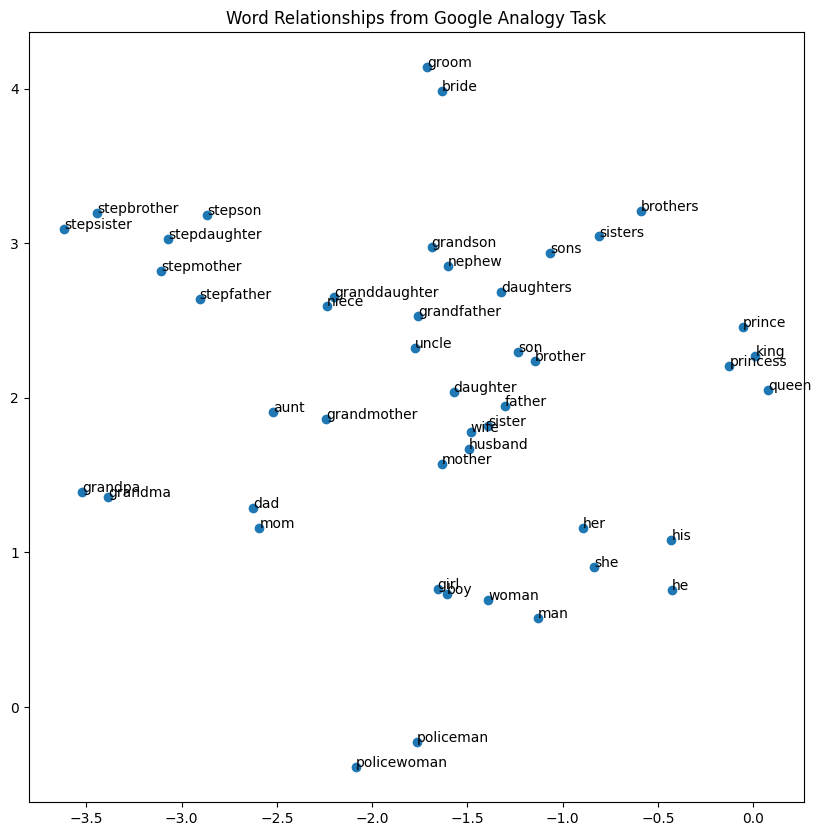

<Figure size 640x480 with 0 Axes>

In [27]:
# Collect words from Google Analogy dataset
SUB_CATEGORY = ": family"

# TODO3: Plot t-SNE for the words in the SUB_CATEGORY `: family`
from sklearn.manifold import TSNE

# Definint the t-SNE 2D representation
tsne = TSNE(n_components=2, metric='cosine', random_state=42)

family_vect_data = []
# words_to_plot = []
words_to_plot = set()

# Obtaining all the unique words from the analogies in the 'family' subcategory
for analogy in data[data['SubCategory'] == ": family"].iloc[:]["Question"]:
    for word in analogy.split(" "):
        words_to_plot.add(word.lower())
        # This part uncommented obtains all words, even non-unique
        # words_to_plot.append(word.lower())
        # family_vect_data.append(model[word.lower()])

# Obtaining the embedding vectors of the unique words in the subcategory
for word in words_to_plot:
    family_vect_data.append(model[word.lower()])

# Obtaining the tsne 2D representation of the embeddings
converted_vec = tsne.fit_transform(np.array(family_vect_data))


# Plotting the figure
plt.figure(figsize=(10, 10), dpi=100)
plt.scatter(converted_vec[:, 0], converted_vec[:, 1])

# Labeling each point with the related word
for label, x, y in zip(words_to_plot, converted_vec[:, 0], converted_vec[:, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.title("Word Relationships from Google Analogy Task")
plt.show()
plt.savefig("word_relationships.png", bbox_inches="tight")

### Part III: Train your own word embeddings

### Get the latest English Wikipedia articles and do sampling.
- Usually, we start from Wikipedia dump (https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2). However, the downloading step will take very long. Also, the cleaning step for the Wikipedia corpus ([`gensim.corpora.wikicorpus.WikiCorpus`](https://radimrehurek.com/gensim/corpora/wikicorpus.html#gensim.corpora.wikicorpus.WikiCorpus)) will take much time. Therefore, we provide cleaned files for you.

In [34]:
# Download the split Wikipedia files
# Each file contain 562365 lines (articles).
!gdown --id 1jiu9E1NalT2Y8EIuWNa1xf2Tw1f1XuGd -O wiki_texts_part_0.txt.gz
!gdown --id 1ABblLRd9HXdXvaNv8H9fFq984bhnowoG -O wiki_texts_part_1.txt.gz
!gdown --id 1z2VFNhpPvCejTP5zyejzKj5YjI_Bn42M -O wiki_texts_part_2.txt.gz
!gdown --id 1VKjded9BxADRhIoCzXy_W8uzVOTWIf0g -O wiki_texts_part_3.txt.gz
!gdown --id 16mBeG26m9LzHXdPe8UrijUIc6sHxhknz -O wiki_texts_part_4.txt.gz

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1jiu9E1NalT2Y8EIuWNa1xf2Tw1f1XuGd

but Gdown can't. Please check connections and permissions.
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warn

In [35]:
# Download the split Wikipedia files
# Each file contain 562365 lines (articles), except the last file.
!gdown --id 17JFvxOH-kc-VmvGkhG7p3iSZSpsWdgJI -O wiki_texts_part_5.txt.gz
!gdown --id 19IvB2vOJRGlrYulnTXlZECR8zT5v550P -O wiki_texts_part_6.txt.gz
!gdown --id 1sjwO8A2SDOKruv6-8NEq7pEIuQ50ygVV -O wiki_texts_part_7.txt.gz
!gdown --id 1s7xKWJmyk98Jbq6Fi1scrHy7fr_ellUX -O wiki_texts_part_8.txt.gz
!gdown --id 17eQXcrvY1cfpKelLbP2BhQKrljnFNykr -O wiki_texts_part_9.txt.gz
!gdown --id 1J5TAN6bNBiSgTIYiPwzmABvGhAF58h62 -O wiki_texts_part_10.txt.gz

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=17JFvxOH-kc-VmvGkhG7p3iSZSpsWdgJI

but Gdown can't. Please check connections and permissions.
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warn

Couldn't download with the above links, so I tried the others.

In [18]:
!gdown --id 1J0os1846PQ129t720aI0wMm-5GepEwSl -O wiki_texts_part_0.txt.gz
!gdown --id 1tsI3RSKPN3b2-1IZ0N7bmjgVRf-THIkW -O wiki_texts_part_1.txt.gz
!gdown --id 1koiw6RFNzDe6pe2zMTfVhsEKmpmnYyu5 -O wiki_texts_part_2.txt.gz
!gdown --id 1YSGbDqhbg2xJsWD_hYQ5z9URl0dCTC2m -O wiki_texts_part_3.txt.gz
!gdown --id 1PA3C99C8CcLFjkenT0a9iU07XEQmXyG_ -O wiki_texts_part_4.txt.gz

/home/didiersalest/NLP_HW1/.venv/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1J0os1846PQ129t720aI0wMm-5GepEwSl
From (redirected): https://drive.google.com/uc?id=1J0os1846PQ129t720aI0wMm-5GepEwSl&confirm=t&uuid=8122646f-1755-494b-aea9-011cd8e6c7e6
To: /home/didiersalest/NLP_HW1/wiki_texts_part_0.txt.gz
100%|██████████████████████████████████████| 1.51G/1.51G [01:05<00:00, 23.2MB/s]
/home/didiersalest/NLP_HW1/.venv/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1tsI3RSKPN3b2-1IZ0N7bmjgVRf-THIkW
From (redirected): https://drive.google.com/uc?

In [19]:
!gdown --id 1sSLea4hq6Z7oT6noOU_II1ahWjNOKcDX -O wiki_texts_part_5.txt.gz
!gdown --id 1i6kXTDtZkRiivJ0mj-5GkVbE4gMFlmSb -O wiki_texts_part_6.txt.gz
!gdown --id 1ain2DN1nxXfsmJ2Aj9TFZlLVJSPsu9Jb -O wiki_texts_part_7.txt.gz
!gdown --id 1UKhvielQDqQz5pMZ7J3SHv9m8_8gO-dE -O wiki_texts_part_8.txt.gz
!gdown --id 1q1zMA4hbMS7tID2GTQx-c94UPB8YQaaa -O wiki_texts_part_9.txt.gz
!gdown --id 1-kkGxwMxPsoGg5_2pdaOeE3Way6njLpH -O wiki_texts_part_10.txt.gz

/home/didiersalest/NLP_HW1/.venv/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1sSLea4hq6Z7oT6noOU_II1ahWjNOKcDX
From (redirected): https://drive.google.com/uc?id=1sSLea4hq6Z7oT6noOU_II1ahWjNOKcDX&confirm=t&uuid=5ced4e5e-866d-41f8-9e12-3bb62ed4567e
To: /home/didiersalest/NLP_HW1/wiki_texts_part_5.txt.gz
100%|████████████████████████████████████████| 578M/578M [00:19<00:00, 30.0MB/s]
/home/didiersalest/NLP_HW1/.venv/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1i6kXTDtZkRiivJ0mj-5GkVbE4gMFlmSb
From (redirected): https://drive.google.com/uc?

In [20]:
# Extract the downloaded wiki_texts_parts files.
!gunzip -k wiki_texts_part_*.gz

In [21]:
# Combine the extracted wiki_texts_parts files.
!cat wiki_texts_part_*.txt > wiki_texts_combined.txt

In [22]:
# Check the first ten lines of the combined file
!head -n 10 wiki_texts_combined.txt

anarchism is political philosophy and movement that is against all forms of authority and seeks to abolish the institutions it claims maintain unnecessary coercion and hierarchy typically including the state and capitalism anarchism advocates for the replacement of the state with stateless societies and voluntary free associations as historically left wing movement this reading of anarchism is placed on the farthest left of the political spectrum usually described as the libertarian wing of the socialist movement libertarian socialism although traces of anarchist ideas are found all throughout history modern anarchism emerged from the enlightenment during the latter half of the th and the first decades of the th century the anarchist movement flourished in most parts of the world and had significant role in workers struggles for emancipation various anarchist schools of thought formed during this period anarchists have taken part in several revolutions most notably in the paris commune

Please note that we used the default parameters of [`gensim.corpora.wikicorpus.WikiCorpus`](https://radimrehurek.com/gensim/corpora/wikicorpus.html#gensim.corpora.wikicorpus.WikiCorpus) for cleaning the Wiki raw file. Thus, words with one character were discarded.

In [23]:
# Now you need to do sampling because the corpus is too big.
# You can further perform analysis with a greater sampling ratio.

import random
from tqdm import tqdm

wiki_txt_path = "wiki_texts_combined.txt"
# wiki_texts_combined.txt is a text file separated by linebreaks (\n).
# Each row in wiki_texts_combined.txt indicates a Wikipedia article.

# Defining variables
output_path = "wiki_texts_combined_sample_20_prcnt.txt"
article_list = []
sample_percentage = 0.2
with open(wiki_txt_path, "r", encoding="utf-8") as f:
    # We obtain the length of the articles
    total=sum(1 for line in f)
    print(f"Total articles: {total}")
    f.seek(0) # after counting moving pointer to the beginning
    with open(output_path, "w", encoding="utf-8") as output_file:
      # TODO4: Sample `20%` Wikipedia articles
      # Write your code here

      # We obtain the length of the sample
      sample_len = sample_percentage * total
      print(f"\nSample length of articles ({sample_percentage*100})%: {sample_len}")
      sampled_indices_articles = random.sample(range(total), int(sample_len))

      # I was having problems processing the lines of the articles fast
      # So I asked Gemini what is the bottleneck in my code, and it was that before I was using a list
      # to validate the sampled_indices_articles, but Gemini suggested to use a set instead for faster lookup

      # for lookup we use a set
      sampled_indices_set = set(sampled_indices_articles)
      print(f"Length sampled indices {len(sampled_indices_articles)}")
      for index, line in tqdm(zip(range(total), f), desc="Writing sampled articles to file...", total=total):
        if index in sampled_indices_set:
          output_file.write(line)


Total articles: 5623655

Sample length of articles (20.0)%: 1124731.0
Length sampled indices 1124731


Writing sampled articles to file...: 100%|██████████| 5623655/5623655 [00:20<00:00, 278296.32it/s]


In [3]:
# TODO5: Train your own word embeddings with the sampled articles
# https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec
# Hint: You should perform some pre-processing before training.
# Preprocessing
sample_article_lst = []
sample_path = "wiki_texts_combined_sample_20_prcnt.txt"
with open(sample_path, "r", encoding="utf-8") as f:
    for line in tqdm(f, desc="Appending sampled articles..."):
      sample_article_lst.append(line)

Appending sampled articles...: 1124731it [00:42, 26665.94it/s]


In [4]:
len(sample_article_lst)

1124731

In [5]:
# Converting the list into pandas dataframe
import pandas as pd
sample_articles_df = pd.DataFrame(
    {
        "Articles": sample_article_lst,
    }
)

In [20]:
from fast_langdetect import detect

print(detect("Hello, world!", model="auto", k=1))

[2025-10-02 03:53:19,087][INFO] - Downloading https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin to lid.176.bin (125.2M)


  0%|          | 0.00/125M [00:00<?, ?B/s]

[{'lang': 'en', 'score': 0.336122989654541}]


In [ ]:
detect("Hello, world!", model="auto", k=1)[0]['lang']

'en'

In [ ]:
from fast_langdetect import detect

def detect_english(text: str)->str:
    return detect(text, model="auto", k=1)[0]['lang']

print(detect_english("Hello my friend!"))

en


In [7]:
tqdm.pandas()
# Gemini helped me in articulating the lambda function
sample_articles_df['lang'] = sample_articles_df['Articles'].apply(lambda x: detect_english(x))

# Filter for English articles
english_articles_df = sample_articles_df[sample_articles_df['lang'] == 'en'].copy()
print(f"Found {len(english_articles_df)} English articles.")

Found 1115791 English articles.


In [8]:
english_articles_df["Tokenized_Articles"] = None
english_articles_df

,Articles,lang,Tokenized_Articles
0,actresses catalan actrius is catalan language ...,en,None
1,agricultural science or agriscience for short ...,en,None
2,alien primarily refers to alien law person in ...,en,None
3,apollo god of light eloquence poetry and the f...,en,None
4,the american football conference afc is one of...,en,None
...,...,...,...
1124726,josé ignacio rodríguez november february was c...,en,None
1124727,the offaly senior hurling championship was the...,en,None
1124728,firefighters in front of bellmore cinema court...,en,None
1124729,the offaly senior hurling championship was the...,en,None


In [10]:
english_articles_df.to_pickle("sampled_20_prcnt_english_articles.pkl")

In [1]:
import pandas as pd
english_articles_df = pd.read_pickle('sampled_20_prcnt_english_articles.pkl')

In [ ]:
from tqdm import tqdm
import spacy

spacy.require_gpu() # To use GPU
nlp = spacy.load("en_core_web_sm", disable=['tagger', 'parser', 'ner', 'senter', 'attribute_ruler'], exclude=['tagger', 'parser', 'ner', 'senter', 'attribute_ruler'])
nlp.add_pipe("doc_cleaner", last=True) 

def validate_pipe(doc):
    lemma_list = [token.lemma_.lower() for token in doc if not token.is_stop]
    return lemma_list

def preprocess_pipe(texts, batch_size=110):
    processed_docs = []
    for doc in tqdm(nlp.pipe(texts, batch_size=batch_size), desc="Tokenizing articles...", total = int(len(texts)/batch_size)):
        processed_docs.append(validate_pipe(doc))

    return processed_docs

In [8]:
english_articles_df["Tokenized_Articles"] = preprocess_pipe(english_articles_df["Articles"])
# preprocess_pipe(english_articles_df["Articles"])

Tokenizing articles...:   0%|          | 0/10143 [00:00<?, ?it/s]/home/didiersalest/NLP_HW1/.venv/lib/python3.12/site-packages/spacy/pipeline/lemmatizer.py:188: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
Tokenizing articles...: 1115791it [59:41, 311.50it/s]                         


In [9]:
english_articles_df.to_pickle("sampled_20_prcnt_tknzd_eng_articles.pkl")

In [11]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(filename='gensim.log', format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO, force=True)

class MonitorCallback(CallbackAny2Vec):
    def __init__(self, test_words):
        self._test_words = test_words

    def on_epoch_end(self, model):
        print("Model loss:", model.get_latest_training_loss())  # print loss
        # for word in self._test_words:  # show wv logic changes
        #     print(model.wv.most_similar(word))
def get_unique_words(tokenized_articles):
    unique_words = set()
    for article in tqdm(tokenized_articles, desc="Counting unique words..."):
        for word in article:
            unique_words.add(word)
    return unique_words

unique_words = list(get_unique_words(english_articles_df["Tokenized_Articles"]))
print(f"Amount of unique words: {len(unique_words)}")
monitor = MonitorCallback(["happy", "angry", "news"])
# setting
vector_dim = 100
window_size = 5
min_count = 20
training_epochs = 1
cpu_cores = 32

# model
word2vec_model = Word2Vec(sentences=english_articles_df["Tokenized_Articles"], 
                          vector_size=vector_dim, window=window_size, workers=cpu_cores,
                          min_count=min_count, epochs=training_epochs, callbacks=[monitor], compute_loss=True)

Counting unique words...:   0%|          | 0/1115791 [00:00<?, ?it/s]

Counting unique words...: 100%|██████████| 1115791/1115791 [00:26<00:00, 42344.41it/s]


Amount of unique words: 4281480
Model loss: 16527603.0


In [38]:
word2vec_model.save("wiki_sample_20_prcnt_model")

In [45]:
# If we want to load
word2vec_model = Word2Vec.load("wiki_sample_20_prcnt_model")

In [46]:
data = pd.read_csv("questions-words.csv")

In [49]:
import pandas as pd
# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []

data_predictions = data.copy()
data_predictions["Gold"] = None
data_predictions["Prediction"] = None

for index, analogy in tqdm(enumerate(data["Question"]), total = len(data["Question"])):
      # TODO6: Write your code here to use your trained word embeddings for getting predictions of the analogy task.
      # You should also preserve the gold answers during iterations for evaluations later.
      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """
      word_a = analogy.split(" ")[0].lower()
      word_b = analogy.split(" ")[1].lower()
      word_c = analogy.split(" ")[2].lower()
      word_d = analogy.split(" ")[3].lower()
      try:
            pred = word2vec_model.wv[word_b] + word2vec_model.wv[word_c] - word2vec_model.wv[word_a]
            most_similar = word2vec_model.wv.most_similar(positive = pred, topn = 1)[0][0]
            preds.append(most_similar)
            golds.append(word_d)
            data_predictions.loc[data_predictions.index[index], "Prediction"] = most_similar
            data_predictions.loc[data_predictions.index[index], "Gold"] = word_d
      except Exception as e:
            print(f"Couldn't predict the question: {e}")
            data_predictions.loc[data_predictions.index[index], "Prediction"] = None
            data_predictions.loc[data_predictions.index[index], "Gold"] = None

 43%|████▎     | 8387/19544 [01:14<01:33, 118.94it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 43%|████▎     | 8427/19544 [01:14<01:28, 125.26it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 43%|████▎     | 8482/19544 [01:15<01:24, 131.10it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 44%|████▎     | 8524/19544 [01:15<01:23, 132.64it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 44%|████▍     | 8552/19544 [01:15<01:24, 129.48it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't pr

 44%|████▍     | 8632/19544 [01:15<00:57, 191.37it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 44%|████▍     | 8690/19544 [01:16<01:11, 151.22it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 45%|████▍     | 8735/19544 [01:16<01:22, 131.76it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 45%|████▍     | 8777/19544 [01:17<01:24, 127.53it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 45%|████▌     | 8816/19544 [01:17<01:25, 124.91it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 45%|████▌     | 8855/19544 [01:17<01:29, 119.14it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 46%|████▌     | 8905/19544 [01:18<01:30, 117.87it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 46%|████▌     | 8930/19544 [01:18<01:28, 119.32it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 46%|████▌     | 8956/19544 [01:18<01:32, 114.35it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 46%|████▌     | 8993/19544 [01:18<01:33, 113.25it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 46%|████▌     | 9018/19544 [01:19<01:29, 117.32it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 46%|████▋     | 9055/19544 [01:19<01:28, 117.95it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 46%|████▋     | 9080/19544 [01:19<01:28, 118.48it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 47%|████▋     | 9106/19544 [01:19<01:26, 121.29it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 47%|████▋     | 9145/19544 [01:20<01:26, 120.14it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 47%|████▋     | 9171/19544 [01:20<01:25, 121.21it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 47%|████▋     | 9197/19544 [01:20<01:23, 124.40it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 47%|████▋     | 9223/19544 [01:20<01:23, 124.05it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 47%|████▋     | 9262/19544 [01:21<01:22, 125.08it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 48%|████▊     | 9326/19544 [01:21<00:59, 172.48it/s]

Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predi

 48%|████▊     | 9345/19544 [01:21<01:06, 154.49it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 48%|████▊     | 9377/19544 [01:21<01:14, 135.96it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 48%|████▊     | 9406/19544 [01:22<01:16, 132.31it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 48%|████▊     | 9448/19544 [01:22<01:19, 126.42it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 48%|████▊     | 9474/19544 [01:22<01:20, 124.93it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 49%|████▊     | 9500/19544 [01:22<01:19, 126.05it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 49%|████▊     | 9527/19544 [01:23<01:19, 126.42it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 49%|████▉     | 9566/19544 [01:23<01:20, 123.90it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 49%|████▉     | 9592/19544 [01:23<01:20, 124.32it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 49%|████▉     | 9618/19544 [01:23<01:19, 125.09it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 49%|████▉     | 9644/19544 [01:24<01:22, 120.41it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"


 50%|████▉     | 9708/19544 [01:24<00:57, 171.60it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 50%|████▉     | 9744/19544 [01:24<01:11, 137.33it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 50%|█████     | 9773/19544 [01:24<01:14, 131.17it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 50%|█████     | 9800/19544 [01:25<01:21, 118.85it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 50%|█████     | 9825/19544 [01:25<01:24, 114.80it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 50%|█████     | 9861/19544 [01:25<01:26, 112.44it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 66%|██████▋   | 12969/19544 [01:54<00:32, 202.05it/s]

Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tas

 67%|██████▋   | 13160/19544 [01:56<00:50, 126.02it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 67%|██████▋   | 13188/19544 [01:56<00:48, 129.81it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 68%|██████▊   | 13217/19544 [01:56<00:48, 129.84it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 68%|██████▊   | 13246/19544 [01:56<00:49, 126.60it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 68%|██████▊   | 13273/19544 [01:56<00:49, 126.72it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 68%|██████▊   | 13314/19544 [01:57<00:47, 130.09it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 68%|██████▊   | 13343/19544 [01:57<00:46, 132.39it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 68%|██████▊   | 13372/19544 [01:57<00:47, 131.19it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 69%|██████▊   | 13401/19544 [01:57<00:46, 132.75it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 69%|██████▉   | 13461/19544 [01:58<00:27, 218.22it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the que

 69%|██████▉   | 13504/19544 [01:58<00:36, 164.21it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 69%|██████▉   | 13522/19544 [01:58<00:37, 159.95it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 69%|██████▉   | 13555/19544 [01:58<00:40, 148.49it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 70%|██████▉   | 13586/19544 [01:59<00:42, 141.30it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 70%|██████▉   | 13617/19544 [01:59<00:43, 137.74it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 70%|██████▉   | 13676/19544 [01:59<00:27, 211.54it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not prese

 70%|███████   | 13719/19544 [01:59<00:36, 159.29it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 70%|███████   | 13737/19544 [02:00<00:38, 150.12it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 70%|███████   | 13768/19544 [02:00<00:42, 135.20it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 71%|███████   | 13836/19544 [02:00<00:29, 191.98it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't p

 71%|███████   | 13901/19544 [02:00<00:24, 226.83it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't p

 71%|███████▏  | 13927/19544 [02:01<00:30, 186.36it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 71%|███████▏  | 13949/19544 [02:01<00:34, 160.46it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 72%|███████▏  | 13985/19544 [02:01<00:38, 142.95it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 72%|███████▏  | 14031/19544 [02:01<00:40, 136.97it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 72%|███████▏  | 14060/19544 [02:02<00:42, 128.46it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 72%|███████▏  | 14087/19544 [02:02<00:46, 116.91it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 72%|███████▏  | 14111/19544 [02:02<00:52, 103.46it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 72%|███████▏  | 14145/19544 [02:03<00:51, 104.63it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 73%|███████▎  | 14180/19544 [02:03<00:51, 104.99it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 96%|█████████▌| 18698/19544 [02:44<00:07, 120.74it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 96%|█████████▌| 18725/19544 [02:44<00:06, 126.27it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 96%|█████████▌| 18751/19544 [02:44<00:06, 124.70it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 96%|█████████▌| 18778/19544 [02:44<00:06, 126.00it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 96%|█████████▌| 18806/19544 [02:45<00:05, 129.12it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 96%|█████████▋| 18834/19544 [02:45<00:05, 131.62it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 97%|█████████▋| 18862/19544 [02:45<00:05, 130.32it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 97%|█████████▋| 18917/19544 [02:45<00:03, 204.15it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the quest

 97%|█████████▋| 18939/19544 [02:46<00:03, 170.47it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 97%|█████████▋| 18975/19544 [02:46<00:03, 144.59it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 97%|█████████▋| 19006/19544 [02:46<00:03, 135.69it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 97%|█████████▋| 19034/19544 [02:46<00:03, 129.82it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 98%|█████████▊| 19062/19544 [02:46<00:03, 128.12it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 98%|█████████▊| 19116/19544 [02:47<00:02, 201.58it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't pr

 98%|█████████▊| 19156/19544 [02:47<00:02, 156.85it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 98%|█████████▊| 19198/19544 [02:47<00:01, 219.29it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't pr

 98%|█████████▊| 19222/19544 [02:47<00:01, 180.28it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 99%|█████████▊| 19262/19544 [02:48<00:01, 153.73it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 99%|█████████▊| 19295/19544 [02:48<00:01, 137.96it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 99%|█████████▉| 19310/19544 [02:48<00:01, 138.94it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 99%|█████████▉| 19340/19544 [02:48<00:01, 134.68it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 99%|█████████▉| 19369/19544 [02:48<00:01, 134.12it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 99%|█████████▉| 19397/19544 [02:49<00:01, 131.57it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 99%|█████████▉| 19425/19544 [02:49<00:00, 129.30it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


100%|█████████▉| 19453/19544 [02:49<00:00, 130.83it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


100%|█████████▉| 19481/19544 [02:49<00:00, 130.39it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


100%|█████████▉| 19509/19544 [02:50<00:00, 128.77it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


100%|██████████| 19544/19544 [02:50<00:00, 114.70it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


In [26]:
# There were many questions that could not be answer this time due to either the word being filtered as it is considered a stopword
# Or maybe because it was infrequent (filtered min freq of 20) or because it was not inside the sampled part of the corpus

print(f"Total amount of data predicted: {len(preds)}/{len(data["Question"])}")

Total amount of data predicted: 18891/19544


In [51]:
# Gemini helped me code this to get the data on the Nones per category and subcategory: 
for category in data_predictions["Category"].unique():
    masked_df = data_predictions.loc[data_predictions["Category"]==category]
    
    # Count of Nones for the category
    nones_per_category = masked_df['Prediction'].isnull().sum()
    print(f"Category: {category}, Count of Nones: {nones_per_category}")

for subcategory in data_predictions["SubCategory"].unique():
    masked_df = data_predictions.loc[data_predictions["SubCategory"]==subcategory]
    
    # Count of Nones for the category
    nones_per_subcategory = masked_df['Prediction'].isnull().sum()
    print(f"Sub-Category{subcategory}, Count of Nones: {nones_per_subcategory}")

Category: Semantic, Count of Nones: 86
Category: Syntactic, Count of Nones: 567
Sub-Category: capital-common-countries, Count of Nones: 0
Sub-Category: capital-world, Count of Nones: 0
Sub-Category: currency, Count of Nones: 0
Sub-Category: city-in-state, Count of Nones: 0
Sub-Category: family, Count of Nones: 86
Sub-Category: gram1-adjective-to-adverb, Count of Nones: 122
Sub-Category: gram2-opposite, Count of Nones: 0
Sub-Category: gram3-comparative, Count of Nones: 0
Sub-Category: gram4-superlative, Count of Nones: 33
Sub-Category: gram5-present-participle, Count of Nones: 244
Sub-Category: gram6-nationality-adjective, Count of Nones: 0
Sub-Category: gram7-past-tense, Count of Nones: 0
Sub-Category: gram8-plural, Count of Nones: 0
Sub-Category: gram9-plural-verbs, Count of Nones: 168


In [27]:
data_predictions

,Question,Category,SubCategory,Gold,Prediction
0,Athens Greece Baghdad Iraq,Semantic,: capital-common-countries,iraq,syria
1,Athens Greece Bangkok Thailand,Semantic,: capital-common-countries,thailand,thailand
2,Athens Greece Beijing China,Semantic,: capital-common-countries,china,china
3,Athens Greece Berlin Germany,Semantic,: capital-common-countries,germany,germany
4,Athens Greece Bern Switzerland,Semantic,: capital-common-countries,switzerland,bern
...,...,...,...,...,...
19539,write writes talk talks,Syntactic,: gram9-plural-verbs,talks,talk
19540,write writes think thinks,Syntactic,: gram9-plural-verbs,thinks,think
19541,write writes vanish vanishes,Syntactic,: gram9-plural-verbs,vanishes,observes
19542,write writes walk walks,Syntactic,: gram9-plural-verbs,walks,walking


In [29]:
none_counts_per_column = data_predictions.isna().sum()
print("None values per column:")
print(none_counts_per_column)

None values per column:
Question         0
Category         0
SubCategory      0
Gold           653
Prediction     653
dtype: int64


In [32]:
import numpy as np
# Perform evaluations. You do not need to modify this block!!

def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)
# data = pd.read_csv("questions-words.csv")

# Evaluation: categories
for category in data_predictions["Category"].unique():
    # mask = data_predictions["Category"] == category 
    masked_df = data_predictions.loc[data_predictions["Category"]==category]
    # golds_cat = masked_df.loc[~masked_df["Gold"].isna()].to_numpy()
    # preds_cat = masked_df.loc[~masked_df["Prediction"].isna()].to_numpy()
    golds_cat = masked_df["Gold"].to_numpy()
    preds_cat = masked_df["Prediction"].to_numpy()
    # golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100}%")

# Evaluation: sub-categories
for sub_category in data_predictions["SubCategory"].unique():
    # mask = data_predictions["SubCategory"] == sub_category
    # golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    masked_df = data_predictions.loc[data_predictions["SubCategory"]==sub_category]
    golds_subcat = masked_df["Gold"].to_numpy()
    preds_subcat = masked_df["Prediction"].to_numpy()
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category{sub_category}, Accuracy: {acc_subcat * 100}%")

Category: Semantic, Accuracy: 24.72657571315819%
Category: Syntactic, Accuracy: 19.971896955503514%
Sub-Category: capital-common-countries, Accuracy: 61.26482213438735%
Sub-Category: capital-world, Accuracy: 30.636604774535808%
Sub-Category: currency, Accuracy: 0.5773672055427251%
Sub-Category: city-in-state, Accuracy: 10.620186461289014%
Sub-Category: family, Accuracy: 45.45454545454545%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 14.616935483870968%
Sub-Category: gram2-opposite, Accuracy: 0.6157635467980296%
Sub-Category: gram3-comparative, Accuracy: 7.657657657657657%
Sub-Category: gram4-superlative, Accuracy: 6.23885918003565%
Sub-Category: gram5-present-participle, Accuracy: 24.90530303030303%
Sub-Category: gram6-nationality-adjective, Accuracy: 70.35647279549718%
Sub-Category: gram7-past-tense, Accuracy: 7.179487179487179%
Sub-Category: gram8-plural, Accuracy: 5.63063063063063%
Sub-Category: gram9-plural-verbs, Accuracy: 27.011494252873565%


Couldn't get the embeddings: "Key 'her' not present"
Couldn't get the embeddings: "Key 'he' not present"
Couldn't get the embeddings: "Key 'his' not present"
Couldn't get the embeddings: "Key 'she' not present"


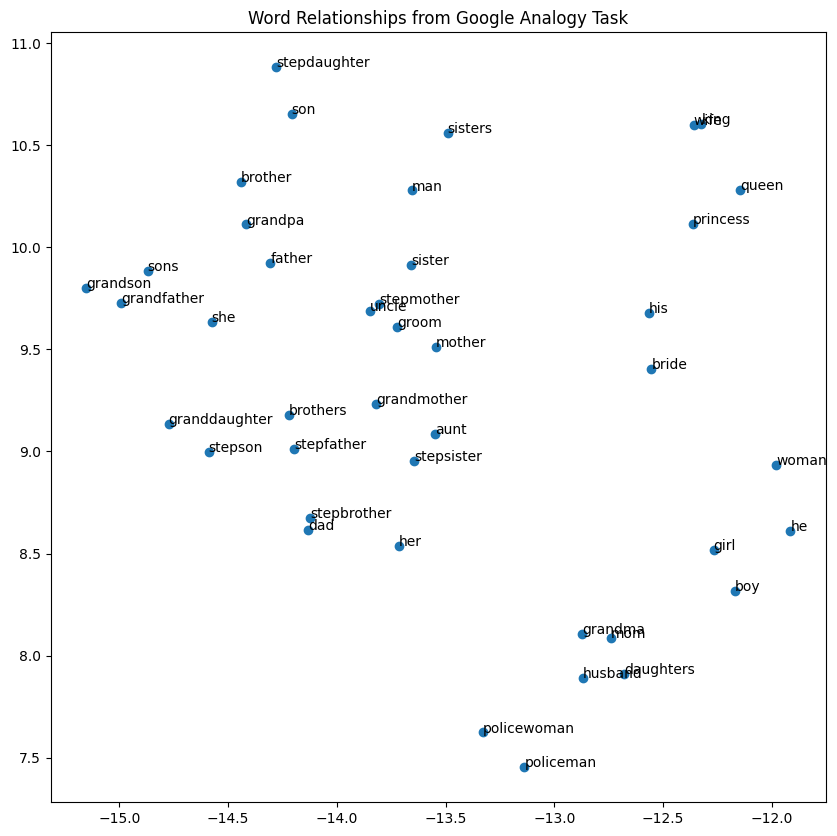

<Figure size 640x480 with 0 Axes>

In [ ]:
# Collect words from Google Analogy dataset
SUB_CATEGORY = ": family"

# TODO7: Plot t-SNE for the words in the SUB_CATEGORY `: family`
from sklearn.manifold import TSNE

# Definint the t-SNE 2D representation
tsne = TSNE(n_components=2, metric='cosine', random_state=42)

family_vect_data = []
words_to_plot = set()

# Obtaining all the unique words from the analogies in the 'family' subcategory
for analogy in data[data['SubCategory'] == ": family"].iloc[:]["Question"]:
    for word in analogy.split(" "):
        words_to_plot.add(word.lower())

# Obtaining the embedding vectors of the unique words in the subcategory
for word in words_to_plot:
    # Some words are not in the vocabulary, so I needed to filter them
    try:
        family_vect_data.append(word2vec_model.wv[word.lower()])
    except Exception as e:
        print(f"Couldn't get the embeddings: {e}")

# Obtaining the tsne 2D representation of the embeddings
converted_vec = tsne.fit_transform(np.array(family_vect_data))


# Plotting the figure
plt.figure(figsize=(10, 10), dpi=100)
plt.scatter(converted_vec[:, 0], converted_vec[:, 1])

# Labeling each point with the related word
for label, x, y in zip(words_to_plot, converted_vec[:, 0], converted_vec[:, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.title("Word Relationships from Google Analogy Task")
plt.show()
plt.savefig("word_relationships_new_model.png", bbox_inches="tight")